In [1]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rc('font', family='sans-serif')
matplotlib.rc('font', serif='Arial')
matplotlib.rc('text', usetex='false')
matplotlib.rc('pdf', fonttype=42)
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib

LinregressResult(slope=0.42068456586830871, intercept=0.33535631356465723, rvalue=0.98216595007804441, pvalue=1.6248285509037941e-14, stderr=0.01898149641313987)
0.420684565868


/home/jchart/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


"\ntest_samples = tqmn.loc[tqmn['Sample'].isin(sample_prop_dict.keys()),:]\ntest_samples['true_log_prop'] = map(lambda x: sample_prop_dict[x],test_samples.Sample)\n\ntest_samples['measued_log_prop'] = np.log2(test_samples.NRFU2/test_samples.NRFU1)\n\nplt.figure(figsize=(8,8))\nax = sns.regplot('true_log_prop','measued_log_prop',data=test_samples)\n\nax.set_xlabel('Log2 Standard Ratio',fontsize='x-large')\nax.set_ylabel('Log2 Observed Ratio',fontsize='x-large')\n#plt.savefig('/home/james/Dropbox/Miller/figures/Multipop_intron4/TaqMan_standard_curve.pdf')\n\n\na= test_samples.loc[test_samples['Sample'] == '1.1:1']['measued_log_prop']\nb= test_samples.loc[test_samples['Sample'] == '1.25:1']['measued_log_prop']\nprint stats.mannwhitneyu(a,b)\nprint stats.ttest_ind(a,b)\n\n\n\nc= test_samples.loc[test_samples['Sample'] == '1:1.1']['measued_log_prop']\nd= test_samples.loc[test_samples['Sample'] == '1:1.25']['measued_log_prop']\nprint stats.mannwhitneyu(b,c)\nprint stats.ttest_ind(b,c)\n\npri

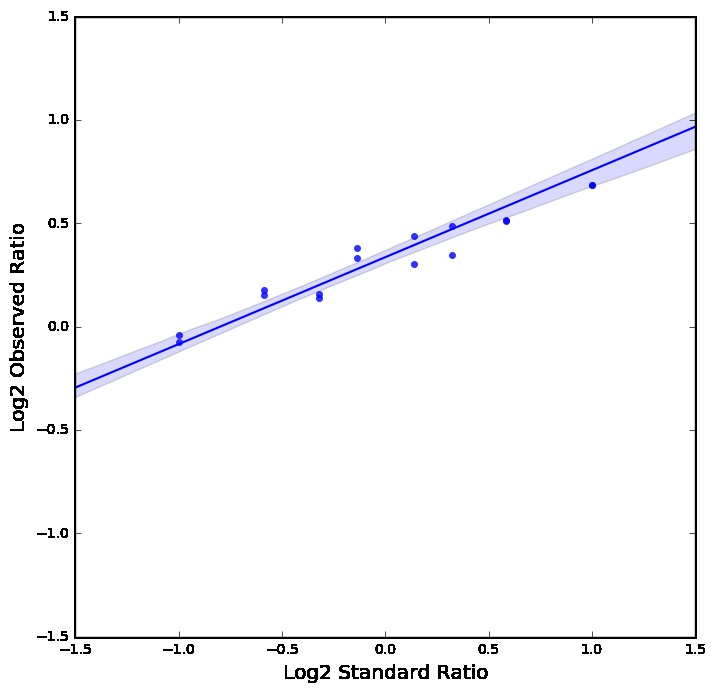

In [2]:
cxr_plod2_tqmn = pd.read_csv('CxR_tqmn_040618/Plod2_tqmn_CxR_1_6_040618 -  Allelic Discrimination Results_ADSheet.csv',header=0)
sample_prop_dict = {
    'CxR_G_STDCV_2' : 3./1,
    'CxR_G_STDCV_3' : 2./1,
    'CxR_G_STDCV_4' : 1.5/1,
    'CxR_G_STDCV_5' : 1.25/1,
    'CxR_G_STDCV_6' : 1.1/1,
    'CxR_G_STDCV_7' : 1/1.1,
    'CxR_G_STDCV_8' : 1/1.25,
    'CxR_G_STDCV_9' : 1/1.5,
    'CxR_G_STDCV_10' : 1/2.,
    'CxR_G_STDCV_11' : 1/3.
}
for key in sample_prop_dict:
    old_val = sample_prop_dict[key]
    sample_prop_dict[key] = math.log(old_val,2)
test_samples = cxr_plod2_tqmn.loc[cxr_plod2_tqmn['Sample'].isin(sample_prop_dict.keys()),:]
test_samples['true_log_prop'] = test_samples['Sample']
#test_samples['true_log_prop'] = map(lambda x: sample_prop_dict[x],test_samples.Sample)
test_samples = test_samples.replace({'true_log_prop':sample_prop_dict})

test_samples['measued_log_prop'] = np.log2(test_samples['RFU2']/test_samples['RFU1'])



plt.figure(figsize=(8,8))
ax = sns.regplot('true_log_prop','measued_log_prop',data=test_samples)

ax.set_xlabel('Log2 Standard Ratio',fontsize='x-large')
ax.set_ylabel('Log2 Observed Ratio',fontsize='x-large')
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
#plt.savefig('/home/james/Dropbox/Miller/figures/Multipop_intron4/TaqMan_standard_curve.pdf')


print(stats.linregress(test_samples['true_log_prop'],test_samples['measued_log_prop']))
calibrated_slope,intercept,r,p,stderr = stats.linregress(test_samples['true_log_prop'],test_samples['measued_log_prop'])
print(calibrated_slope)


'''
test_samples = tqmn.loc[tqmn['Sample'].isin(sample_prop_dict.keys()),:]
test_samples['true_log_prop'] = map(lambda x: sample_prop_dict[x],test_samples.Sample)

test_samples['measued_log_prop'] = np.log2(test_samples.NRFU2/test_samples.NRFU1)

plt.figure(figsize=(8,8))
ax = sns.regplot('true_log_prop','measued_log_prop',data=test_samples)

ax.set_xlabel('Log2 Standard Ratio',fontsize='x-large')
ax.set_ylabel('Log2 Observed Ratio',fontsize='x-large')
#plt.savefig('/home/james/Dropbox/Miller/figures/Multipop_intron4/TaqMan_standard_curve.pdf')


a= test_samples.loc[test_samples['Sample'] == '1.1:1']['measued_log_prop']
b= test_samples.loc[test_samples['Sample'] == '1.25:1']['measued_log_prop']
print stats.mannwhitneyu(a,b)
print stats.ttest_ind(a,b)



c= test_samples.loc[test_samples['Sample'] == '1:1.1']['measued_log_prop']
d= test_samples.loc[test_samples['Sample'] == '1:1.25']['measued_log_prop']
print stats.mannwhitneyu(b,c)
print stats.ttest_ind(b,c)

print stats.mannwhitneyu(c,d)
print stats.ttest_ind(c,d)

print stats.linregress(test_samples['true_log_prop'],test_samples['measued_log_prop'])
calibrated_slope,intercept,r,p,stderr = stats.linregress(test_samples['true_log_prop'],test_samples['measued_log_prop'])
print calibrated_slope
'''

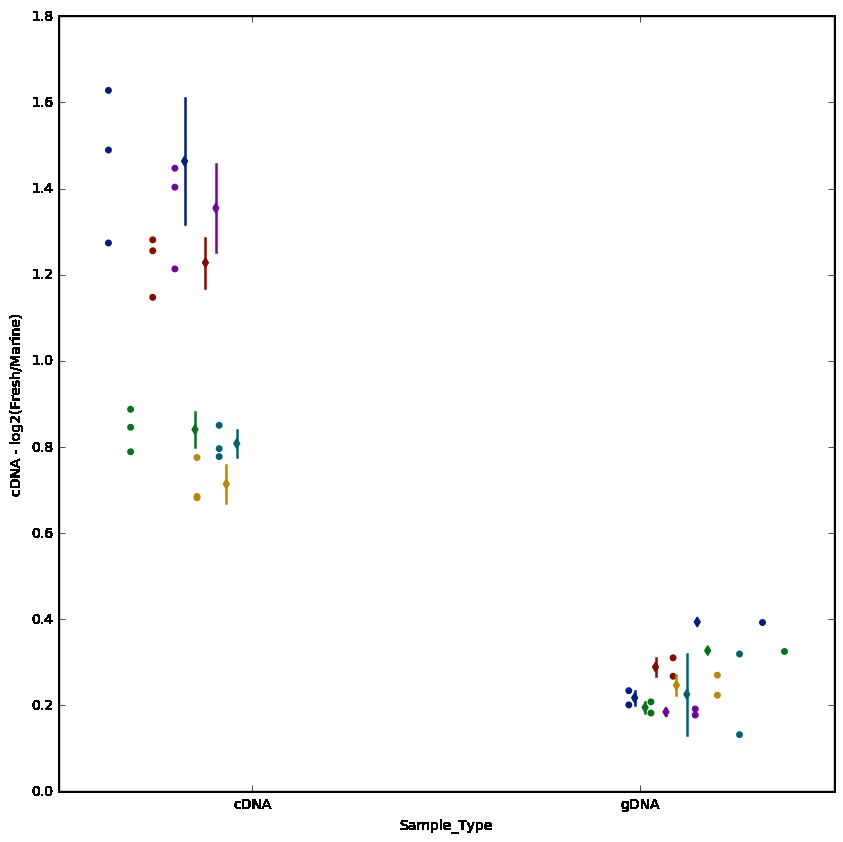

In [3]:
cxr_plod2_tqmn = pd.read_csv('CxR_tqmn_040618/Plod2_tqmn_CxR_1_6_040618 -  Allelic Discrimination Results_ADSheet.csv',header=0)
test_samples = cxr_plod2_tqmn.loc[~(cxr_plod2_tqmn['Sample'].isin(list(sample_prop_dict.keys())+ ['CxR_G_STDCV_1','CxR_G_STDCV_12'])),
                                  ['Sample','RFU1','RFU2','Sample_Type']]
test_samples = test_samples.dropna()
test_samples['measued_log_prop'] = np.log2(test_samples['RFU2']/test_samples['RFU1'])
test_samples['true_log_prop'] = test_samples['measued_log_prop']#/calibrated_slope

#print(test_samples)
plt.figure(figsize=(10,10))


ax=sns.pointplot(x="Sample_Type", y="true_log_prop", hue="Sample",
              data=test_samples, dodge=True,palette='dark', join=False,
              markers="d",ci ='sd')
sns.stripplot(x='Sample_Type',y='true_log_prop',hue='Sample',
              data=test_samples,dodge=True,palette='dark')
ax.legend_.remove()
#ax.set_ylim((-2,0))
ax.set_ylabel('cDNA - log2(Fresh/Marine)')


/home/jchart/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LinregressResult(slope=0.5391953239572792, intercept=0.44507835757197883, rvalue=0.99558601049922746, pvalue=1.3098133136942621e-11, stderr=0.016073786852450502)
0.539195323957


"\ntest_samples = tqmn.loc[tqmn['Sample'].isin(sample_prop_dict.keys()),:]\ntest_samples['true_log_prop'] = map(lambda x: sample_prop_dict[x],test_samples.Sample)\n\ntest_samples['measued_log_prop'] = np.log2(test_samples.NRFU2/test_samples.NRFU1)\n\nplt.figure(figsize=(8,8))\nax = sns.regplot('true_log_prop','measued_log_prop',data=test_samples)\n\nax.set_xlabel('Log2 Standard Ratio',fontsize='x-large')\nax.set_ylabel('Log2 Observed Ratio',fontsize='x-large')\n#plt.savefig('/home/james/Dropbox/Miller/figures/Multipop_intron4/TaqMan_standard_curve.pdf')\n\n\na= test_samples.loc[test_samples['Sample'] == '1.1:1']['measued_log_prop']\nb= test_samples.loc[test_samples['Sample'] == '1.25:1']['measued_log_prop']\nprint stats.mannwhitneyu(a,b)\nprint stats.ttest_ind(a,b)\n\n\n\nc= test_samples.loc[test_samples['Sample'] == '1:1.1']['measued_log_prop']\nd= test_samples.loc[test_samples['Sample'] == '1:1.25']['measued_log_prop']\nprint stats.mannwhitneyu(b,c)\nprint stats.ttest_ind(b,c)\n\npri

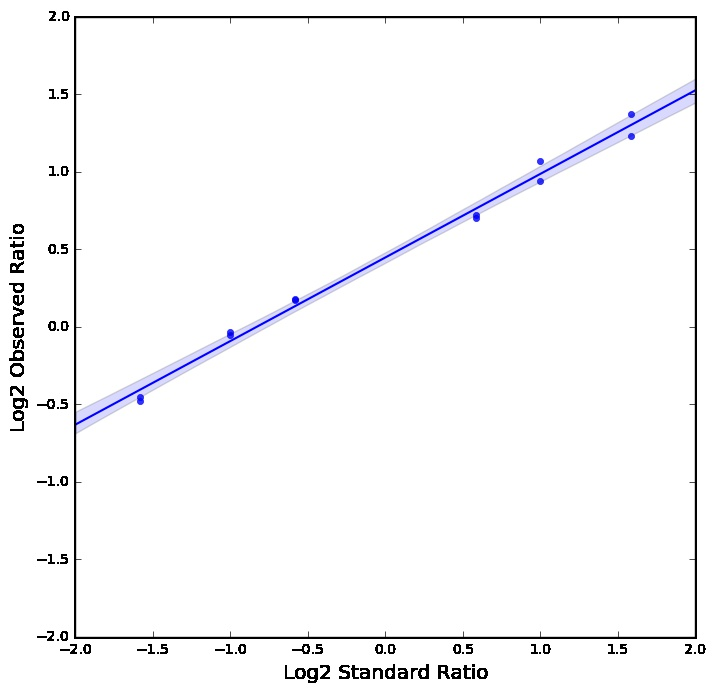

In [4]:
cxr_plod2_tqmn = pd.read_excel('Plod2_taqman_042218/Plod2_tqmn_CxR_7_12_042218 -  Allelic Discrimination Results.xlsx',header=0)
sample_prop_dict = {
    'CxR_G_STDCV_2_2' : 3./1,
    'CxR_G_STDCV_2_3' : 2./1,
    'CxR_G_STDCV_2_4' : 1.5/1,
    'CxR_G_STDCV_2_5' : 1/1.5,
    'CxR_G_STDCV_2_6' : 1/2.,
    'CxR_G_STDCV_2_7' : 1/3.
}
for key in sample_prop_dict:
    old_val = sample_prop_dict[key]
    sample_prop_dict[key] = math.log(old_val,2)
test_samples = cxr_plod2_tqmn.loc[cxr_plod2_tqmn['Sample'].isin(sample_prop_dict.keys()),:]
test_samples['true_log_prop'] = test_samples['Sample']
#test_samples['true_log_prop'] = map(lambda x: sample_prop_dict[x],test_samples.Sample)
test_samples = test_samples.replace({'true_log_prop':sample_prop_dict})
test_samples['measued_log_prop'] = np.log2(test_samples['RFU2']/test_samples['RFU1'])



plt.figure(figsize=(8,8))
ax = sns.regplot('true_log_prop','measued_log_prop',data=test_samples)

ax.set_xlabel('Log2 Standard Ratio',fontsize='x-large')
ax.set_ylabel('Log2 Observed Ratio',fontsize='x-large')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
#plt.savefig('/home/james/Dropbox/Miller/figures/Multipop_intron4/TaqMan_standard_curve.pdf')


print(stats.linregress(test_samples['true_log_prop'],test_samples['measued_log_prop']))
calibrated_slope,intercept,r,p,stderr = stats.linregress(test_samples['true_log_prop'],test_samples['measued_log_prop'])
print(calibrated_slope)
ax.set_xlabel('Log2 Standard Ratio',fontsize='x-large')
ax.set_ylabel('Log2 Observed Ratio',fontsize='x-large')
plt.savefig('Plod2_TaqMan_standard_curve_042218.pdf')

'''
test_samples = tqmn.loc[tqmn['Sample'].isin(sample_prop_dict.keys()),:]
test_samples['true_log_prop'] = map(lambda x: sample_prop_dict[x],test_samples.Sample)

test_samples['measued_log_prop'] = np.log2(test_samples.NRFU2/test_samples.NRFU1)

plt.figure(figsize=(8,8))
ax = sns.regplot('true_log_prop','measued_log_prop',data=test_samples)

ax.set_xlabel('Log2 Standard Ratio',fontsize='x-large')
ax.set_ylabel('Log2 Observed Ratio',fontsize='x-large')
#plt.savefig('/home/james/Dropbox/Miller/figures/Multipop_intron4/TaqMan_standard_curve.pdf')


a= test_samples.loc[test_samples['Sample'] == '1.1:1']['measued_log_prop']
b= test_samples.loc[test_samples['Sample'] == '1.25:1']['measued_log_prop']
print stats.mannwhitneyu(a,b)
print stats.ttest_ind(a,b)



c= test_samples.loc[test_samples['Sample'] == '1:1.1']['measued_log_prop']
d= test_samples.loc[test_samples['Sample'] == '1:1.25']['measued_log_prop']
print stats.mannwhitneyu(b,c)
print stats.ttest_ind(b,c)

print stats.mannwhitneyu(c,d)
print stats.ttest_ind(c,d)

print stats.linregress(test_samples['true_log_prop'],test_samples['measued_log_prop'])
calibrated_slope,intercept,r,p,stderr = stats.linregress(test_samples['true_log_prop'],test_samples['measued_log_prop'])
print calibrated_slope
'''

             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  true_log_prop
No. Observations:  26       Method:              REML         
No. Groups:        10       Scale:               0.0570       
Min. group size:   2        Likelihood:          -9.7245      
Max. group size:   3        Converged:           Yes          
Mean group size:   2.6                                        
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            1.970    0.154 12.772 0.000  1.668  2.273
Sample_Type[T.pDNA] -1.255    0.249 -5.045 0.000 -1.742 -0.767
Intercept RE         0.124    0.448                           

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__',

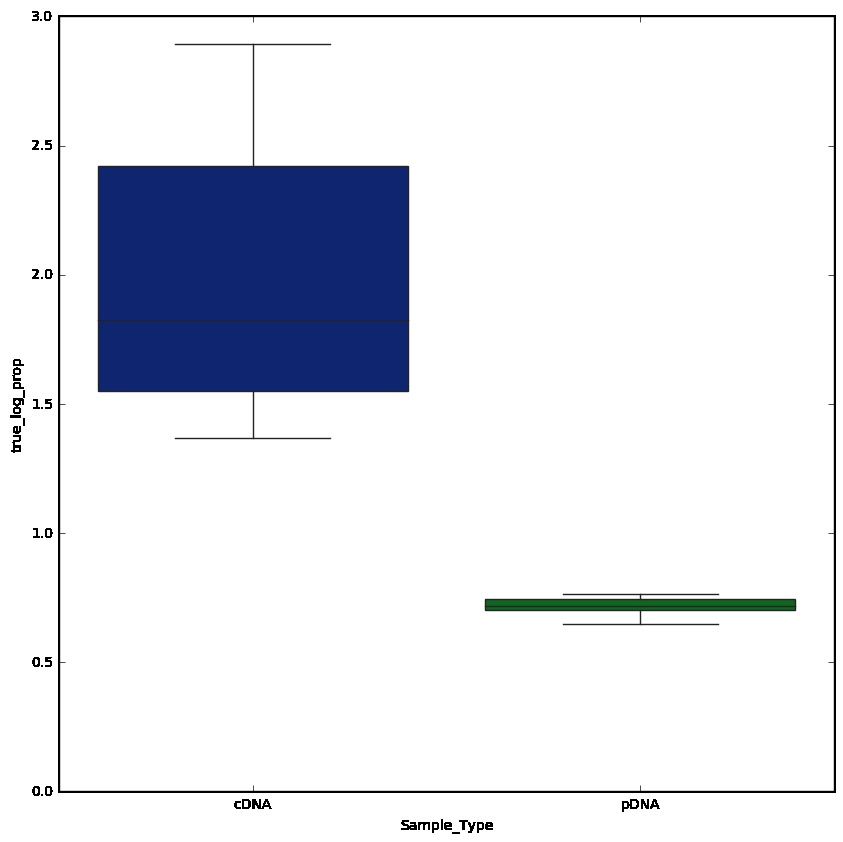

In [7]:
cxr_plod2_tqmn = pd.read_excel('Plod2_taqman_042218/Plod2_tqmn_CxR_7_12_042218 -  Allelic Discrimination Results.xlsx',header=0)
test_samples = cxr_plod2_tqmn.loc[~(cxr_plod2_tqmn['Sample_Type'] == 'stdcv'),
                                  ['Sample','RFU1','RFU2','Sample_Type']]
test_samples = test_samples.dropna()
#print test_samples
test_samples['measued_log_prop'] = np.log2(test_samples['RFU2']/test_samples['RFU1'])
test_samples['true_log_prop'] = test_samples['measued_log_prop']/calibrated_slope

#print(test_samples)
plt.figure(figsize=(10,10))


#tqmn_1303_W
sns.boxplot(x="Sample_Type", y="true_log_prop",
              data=test_samples,palette='dark')
plt.ylim([0,3])
plt.savefig('Plod2_TaqMan_gDNA_cDNA_042218.pdf')



md = smf.mixedlm("true_log_prop ~ Sample_Type", data=test_samples, groups=test_samples["Sample"])

mdf = md.fit()

print(mdf.summary())
print(dir(mdf))
print(mdf.pvalues)